<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Simple_Linear_Regression_Basic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
!pip install opendatasets --quiet

In [8]:
import opendatasets as od 

url = 'https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset'
od.download(url)

100%|██████████| 378/378 [00:00<00:00, 215kB/s]

In [9]:
salary_df = pd.read_csv('./salary/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Clean Data

In [10]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
salary_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Data Features

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    KFold
)

X_train, X_test, y_train, y_test = train_test_split(
    salary_df.drop(columns=['YearsExperience']),
    salary_df.Salary,
    test_size=0.2,
    random_state=42,
    )


## Model

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error

test_preds = model.predict(X_test)
test_score = mean_absolute_error(X_test, test_preds)
print(test_score.round(3) * 100)

0.0


In [30]:
train_preds = model.predict(X_train)
train_score = mean_absolute_error(X_train, train_preds)
print(train_score.round(3) * 100)

0.0


In [26]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(
    model,
    salary_df.drop(columns=['YearsExperience']),
    salary_df.Salary,
    cv=kfolds,
    return_train_score=True,
    scoring='neg_mean_absolute_error'
)

cv_results

{'fit_time': array([0.00524068, 0.002033  , 0.00250101, 0.00200963, 0.00186515,
        0.00186801, 0.00182605, 0.00179696, 0.00194764, 0.00190258]),
 'score_time': array([0.00307441, 0.00139499, 0.00156021, 0.0014317 , 0.0012815 ,
        0.00135326, 0.00127459, 0.00130582, 0.00130296, 0.0015409 ]),
 'test_score': array([-0.00000000e+00, -0.00000000e+00, -9.70127682e-12, -4.85063841e-12,
        -0.00000000e+00, -0.00000000e+00, -7.27595761e-12, -0.00000000e+00,
        -7.27595761e-12, -0.00000000e+00]),
 'train_score': array([-0.00000000e+00, -0.00000000e+00, -4.58115850e-12, -5.12011832e-12,
        -5.65907814e-12, -0.00000000e+00, -4.85063841e-12, -0.00000000e+00,
        -1.10486764e-11, -5.65907814e-12])}

In [31]:
results = pd.DataFrame(data=cv_results)
results

,fit_time,score_time,test_score,train_score
0,0.005241,0.003074,-0.000000e+00,-0.000000e+00
1,0.002033,0.001395,-0.000000e+00,-0.000000e+00
2,0.002501,0.001560,-9.701277e-12,-4.581158e-12
3,0.002010,0.001432,-4.850638e-12,-5.120118e-12
4,0.001865,0.001281,-0.000000e+00,-5.659078e-12
5,0.001868,0.001353,-0.000000e+00,-0.000000e+00
6,0.001826,0.001275,-7.275958e-12,-4.850638e-12
7,0.001797,0.001306,-0.000000e+00,-0.000000e+00
8,0.001948,0.001303,-7.275958e-12,-1.104868e-11
9,0.001903,0.001541,-0.000000e+00,-5.659078e-12


In [32]:
results = results.assign(
    test_error = -1 * results.test_score,
    train_error = -1 * results.train_score,
)

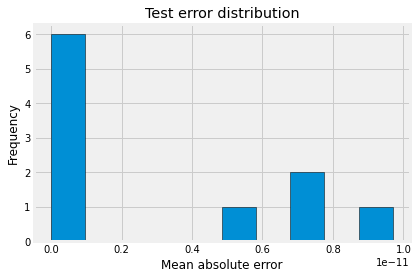

In [33]:
results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Test error distribution")

In [34]:
print(f"The mean cross-validated testing error is: "
      f"{results['test_error'].mean():.2f}")

print(f"The standard deviation of the testing error is: "
      f"{results['test_error'].std():.2f}")

The mean cross-validated testing error is: 0.00
The standard deviation of the testing error is: 0.00


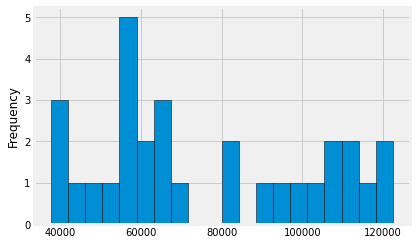

In [35]:
salary_df.Salary.plot.hist(bins=20, edgecolor="black")


In [36]:
print(f"The standard deviation of the target is: {salary_df.Salary.std():.2f}")

The standard deviation of the target is: 27414.43
